In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
sns.set()

## Data Import 

In [72]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")
col = train.columns

In [73]:
#Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
f=128903 #bullet styling
col # Colum names
for i, n in enumerate(col):
    print("{:c} index: {}  column name: {}".format(f,i,n))

🞇 index: 0  column name: PassengerId
🞇 index: 1  column name: Survived
🞇 index: 2  column name: Pclass
🞇 index: 3  column name: Name
🞇 index: 4  column name: Sex
🞇 index: 5  column name: Age
🞇 index: 6  column name: SibSp
🞇 index: 7  column name: Parch
🞇 index: 8  column name: Ticket
🞇 index: 9  column name: Fare
🞇 index: 10  column name: Cabin
🞇 index: 11  column name: Embarked


## Preprocessing:

In [75]:
def toDoPrint(List,f):
    str =""
    temp = ""
    for i in List:
        temp ="{:c} {}".format(f,i)
        print(temp)
        str += temp + "\n"
    return str
        
        
        
Todo = {"Missing data: Age, Cabin, Embarked",
        "Handling Data","Convert string values to numeric", 
        "Remove cols that do not contribute: Name, Cabin, Ticket and ?"
    }

todo_list = toDoPrint(Todo,f)

🞇 Convert string values to numeric
🞇 Remove cols that do not contribute: Name, Cabin, Ticket and ?
🞇 Missing data: Age, Cabin, Embarked
🞇 Handling Data


In [76]:
def sexRatio(data):
    """m = male 
       f = female
       t = Total
       return an array [men%, female%, Total]
    """
    m=data.Sex[train.Sex=="male"].count()
    f=data.Sex[train.Sex=="female"].count()
    t=m+f
    return [m/t*100,f/t*100,t]

In [77]:
def sumList(a,b):
    """return corresponding sum of each elements"""
    length = len(a)
    if(length != len(b)):
        print("A and B are not the same length")
        return []
    
    sum_v =[]
    for i in range(0,length):
        sum_v.append(a[i]+b[i])
        
    return sum_v
    
    
def pieChart(data, data1=[], both=False):
  
    
    if(both):
        ratio = sumList(sexRatio(data),sexRatio(data1))
    else:
        ratio = sexRatio(data)
    
    labels = 'Male', 'Female'
    sizes = [ratio[0], ratio[1]]
    

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    

    plt.show()

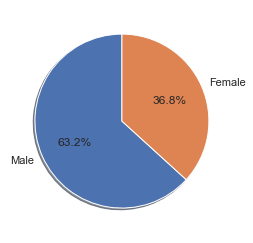

In [78]:
pieChart(train,test,both=True)

## Missing data:

In [79]:
def numerOfMissingValues(p, col, get_data = False):
    """numerOfMissingValues(pd, col, get_data = False)
       p: DataFrame
       col: column that needs to find the missing values

       Returns the total number of missing data
       return the pandas DatFrame of values if get_data is set to True
    """
    data = p[pd.isnull(p[col])]
    if get_data:
        return data
    else: 
        return len(data)

In [80]:
# As shown on info there are 891 rows of data

missing =['Age', 'Cabin','Embarked']
for i in missing:
    print("{:c} Number of values missing in {} is: {}".format(f,i,numerOfMissingValues(train,i)))
    

🞇 Number of values missing in Age is: 177
🞇 Number of values missing in Cabin is: 687
🞇 Number of values missing in Embarked is: 2


***As shown above there are 177 missing values in Age, Cabin and Embarked**

### Handling Missing Data

In [82]:
#Age: interpolate the missing data
train['Age'] = train['Age'].interpolate()
#Drop 'Name','Ticket','Cabin' because it is nor relavant to the model
cols = ['Name','Ticket','Cabin']
train = train.drop(cols,axis=1)

KeyError: "['Name' 'Ticket' 'Cabin'] not found in axis"

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Converting String literals to Numeric:

In [84]:
"""
def stringToNum(row):
    if(row.Sex)=="female":
        row.Sex = 1
    else:
        row.Sex = 2

    if(row.Embarked)=="S":
        row.Embarked = 1
    elif row.Embarked == "C":
        row.Embarked = 2
    else:
        row.Embarked = 3
        
    return row

train =train.apply(stringToNum, axis='columns')
train.head(10)
"""

'\ndef stringToNum(row):\n    if(row.Sex)=="female":\n        row.Sex = 1\n    else:\n        row.Sex = 2\n\n    if(row.Embarked)=="S":\n        row.Embarked = 1\n    elif row.Embarked == "C":\n        row.Embarked = 2\n    else:\n        row.Embarked = 3\n        \n    return row\n\ntrain =train.apply(stringToNum, axis=\'columns\')\ntrain.head(10)\n'

### Classification:

In [85]:
df = train
x = df.values
y = df['Survived'].values
x = np.delete(x,1,axis=1)

In [86]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(x,y,test_size=.3)

In [87]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

ValueError: could not convert string to float: 'male'

In [41]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (X_train, Y_train)
clf.score (X_test, Y_test)

0.8208955223880597

In [70]:
t = 0.01
s = 0.0
temp = []
temp1 = []
while s < .90:
    X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(x,y,test_size=t)
    clf = ensemble.GradientBoostingClassifier()
    clf.fit (X_train, Y_train)
    s =clf.score (X_test, Y_test)
    temp.append(t)
    temp1.append(s)
    if(t > 0.98):
        break
    t +=.01
    print(s)

0.6666666666666666
0.7777777777777778
0.7407407407407407
0.7777777777777778
0.7333333333333333
0.8148148148148148
0.873015873015873
0.8611111111111112
0.7777777777777778
0.8111111111111111
0.8686868686868687
0.8130841121495327
0.8448275862068966
0.768
0.7910447761194029
0.7972027972027972
0.8223684210526315
0.8322981366459627
0.8294117647058824
0.8324022346368715
0.7872340425531915
0.8121827411167513
0.8195121951219512
0.8878504672897196
0.8071748878923767
0.7974137931034483
0.8049792531120332
0.8
0.8146718146718147
0.7761194029850746
0.8086642599277978
0.8356643356643356
0.8033898305084746
0.8184818481848185
0.8237179487179487
0.8161993769470405
0.8333333333333334
0.8112094395280236
0.7873563218390804
0.7675070028011205
0.7896174863387978
0.8133333333333334
0.8203125
0.8091603053435115
0.8079800498753117
0.8073170731707318
0.8138424821002387
0.8317757009345794
0.7803203661327232
0.8116591928251121
0.7978021978021979
0.7866379310344828
0.7906976744186046
0.8112033195020747
0.8004073319

AttributeError: 'list' object has no attribute 'plot'

In [56]:
data

[[[0.01,
   0.02,
   0.03,
   0.04,
   0.05,
   0.060000000000000005,
   0.07,
   0.08,
   0.09,
   0.09999999999999999,
   0.10999999999999999,
   0.11999999999999998,
   0.12999999999999998,
   0.13999999999999999,
   0.15,
   0.16,
   0.17,
   0.18000000000000002,
   0.19000000000000003,
   0.20000000000000004,
   0.21000000000000005,
   0.22000000000000006,
   0.23000000000000007,
   0.24000000000000007,
   0.25000000000000006,
   0.26000000000000006,
   0.2700000000000001,
   0.2800000000000001,
   0.2900000000000001,
   0.3000000000000001,
   0.3100000000000001,
   0.3200000000000001,
   0.3300000000000001,
   0.34000000000000014,
   0.35000000000000014,
   0.36000000000000015,
   0.37000000000000016,
   0.38000000000000017,
   0.3900000000000002,
   0.4000000000000002,
   0.4100000000000002,
   0.4200000000000002,
   0.4300000000000002,
   0.4400000000000002,
   0.45000000000000023,
   0.46000000000000024,
   0.47000000000000025,
   0.48000000000000026,
   0.49000000000000027,
 